# Assignment: Linear Regression
In this assignment you will implement Linear Regression for a very simple test case. Please fill into the marked places of the code
  
  (1) the cost function
  (2) the update function for Gradient Descent

Pieces of code that need to be updated are marked with "HERE YOU ..."

This assignment is kept very simple on purpose to help you familiarize with Linear Regression and its implementation using python (Jupyter notebooks). Feel free to make some useful tests such as, but not limited to:
- What happens if the learning rate is too high or too low?
- Can Linear Regression really find the absolute global minimum?
- What effect does it have if you change the initial guess for the gradient descent to something completely off?
- What happens if you are not updating thet0 and thet1 "simultaneously" but you are updating both parameters in separate for loops (see below)?
- You can try to turn this code for Linear Regression into an implementation of Logistic Regression

## Import the required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

## Function to calculate the Gradiend descent
You may find helpful the use of cost (one of the costFunction output parameters) to debug this method
Hint: print("Iteration %d | Cost: %f" % (i, cost))

In [2]:
def gradientDescent(x, y, theta, alpha, m, maxsteps):
    thetaHist=np.empty([maxsteps, 2])
    xTrans = x.transpose()
    for i in range(0, maxsteps):
        prediction = np.dot(x,theta)
        gradient = np.dot(xTrans,(prediction-y))/m
        theta = theta - alpha*gradient

        thetaHist[i] = theta
    return theta, thetaHist

## Function to calcultate the cost function
The cost function template is returning two parameters, loss and cost. We proposed these two paremeters to facilitate the implementation having not only the cost but also the difference between y and the prediction directly (loss).

In [8]:
def costFunction(x, y, theta):
    prediction = np.dot(x,theta)
    cost = np.sum(np.square(prediction-y))/(2*len(y))
    loss = prediction - y
    return cost, loss

## Define some training data
To test your algorithm it is a good idea to start with very simple test data where you know the right answer. So let's put all data points on a line first. Variables x and y represent a (very simple) training set (a dataset with 9 instances). Feel free to play with this test data or use a more realistic one.

$NOTE:$ The column with 1’s included in the variable x is used to facilitate the calculations in the Gradient Descent function (do you remember the x<sub>0</sub> to use the matrix form? If not, revise the lecture).

In [9]:
x=np.array([[1, 0], [1, 0.5], [1, 1], [1, 1.5], [1, 2], [1, 2.5], [1, 3], [1, 4], [1, 5]])
y=np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5])

## Calculate length of training set


In [10]:
m, n = np.shape(x)

## Plot training set


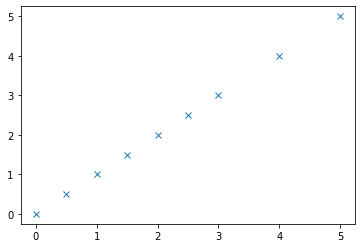

In [11]:
fig = plt.figure(1)  # An empty figure with no axes
plt.plot(x[:,1], y, 'x')

## Cost function
Also it is useful for simple test cases to not just run an optimization but first to do a systematic search. So let us first calculate the values of the cost function for different parameters theta


In [21]:
theta0 = np.arange(-2, 2.01, 0.25)
theta1 = np.arange(-2, 3.01, 0.25)


costs = []
J = np.empty([len(theta0),len(theta1)])
# Calculate values of the cost function
for i in range(0, len(theta0)):
    for j in range(0, len(theta1)):
        cost, loss = costFunction(x, y, [theta0[i], theta1[j]])
        costs.append([theta0[i], theta1[i], cost])
        J[i][j] = cost

## Visualize the cost function
Let us do some test plots to see the cost function J and to analyze how it depends on the parameters theta0 and theta1


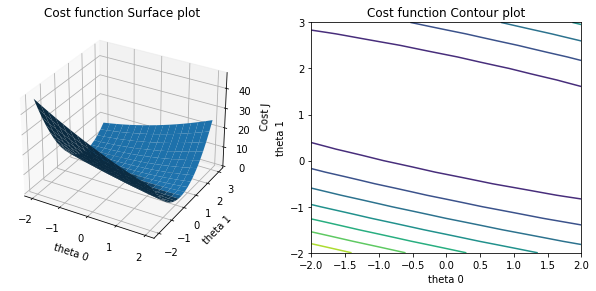

In [22]:
theta0, theta1 = np.meshgrid(theta0, theta1)
fig2 = plt.figure(2)
ax = fig2.add_subplot(121, projection="3d")
surf = ax.plot_surface(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost J')
ax.set_title('Cost function Surface plot')

ax = fig2.add_subplot(122)
contour = ax.contour(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_title('Cost function Contour plot')

fig2.subplots_adjust(bottom=0.1, right=1.5, top=0.9)

## Gradient descent implementation
Here we implement Gradient Descent


In [23]:
alpha = 0.05        # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)

## Print found optimal values



In [24]:
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

Optimized Theta0 is  3.985292837903086e-07
Optimized Theta1 is  0.9999998725702243


## Visualization of the solution
Now let's plot the found solutions of the Gradient Descent algorithms on the contour plot of our cost function to see how it approaches the desired minimum.


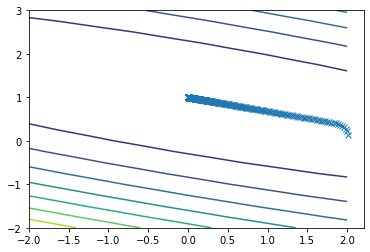

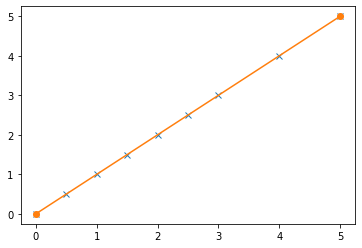

In [25]:
fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

### Question 1: (What happens  if the  learning  rate  is too low)

Optimized Theta0 is  1.8027627529186308
Optimized Theta1 is  0.4162373563447832


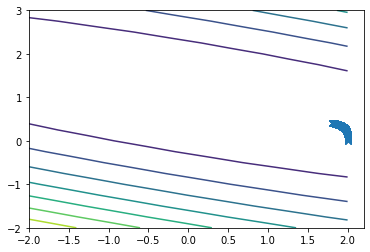

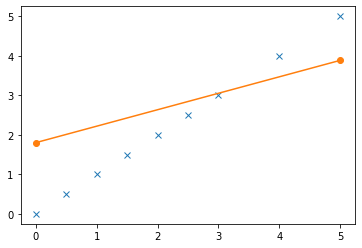

In [30]:
alpha = 0.0005
maxsteps = 1000
thet = [2, 0]
thet, thetaHist = gradientDescent(x, y, thet,alpha, m, maxsteps);

print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

fig4 = plt.figure(4)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

As a result we can see that it does not reach the global minimum. This happens because when we decrease the learning rate, alpha in our case, Gradient Descents converges to the minimum slower. By decreasing the learning rate, our algorithm becomes more precise but also require more iterations due to smaller steps towards the global minima. In our case we get this results because it runs out of interpretations, tho if we increase the maximum amount it would converge to the minima as follows:

Optimized Theta0 is  4.48448720268707e-07
Optimized Theta1 is  0.9999998566084793


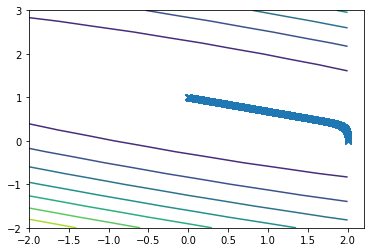

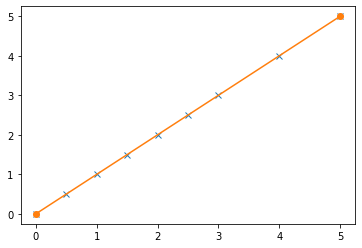

In [33]:
alpha = 0.0005
maxsteps = 100000
thet = [2, 0]
thet, thetaHist = gradientDescent(x, y, thet,alpha, m, maxsteps);

print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

fig5 = plt.figure(5)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

### Question 2: (What happens  if the  learning  rate  is too high?)

Optimized Theta0 is  nan
Optimized Theta1 is  nan


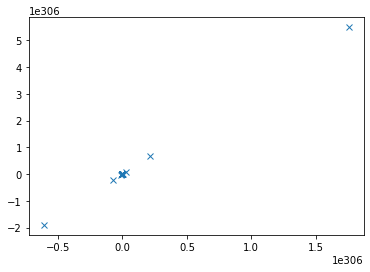

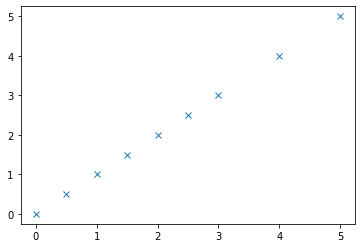

In [34]:
alpha = 0.5
maxsteps = 1000
thet = [2, 0]
thet, thetaHist = gradientDescent(x, y, thet,alpha, m, maxsteps);

print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

fig6 = plt.figure(6)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

Results of increasing the learning rate are opposite to the ones of making it tiny, steps are becoming too big and the global minimum might be never be found. The algorithm might never converge to the global minimum because it can just "jump" over it.

### Question 3: (Can Linear Regression really find the absolute global minimum?  Explain why/why not.)

Gradient Descent can always find a solution in case of Linear Regression with the least square error because the function in this case is always convex, so there are no local minimums and the algorithm is gonna always converge to a global minima. However, is the function is more complicated e.g. polynomial regression, Gradient descent might not find the absolute global minimum but more sophisticated optimization methods exist.

### Question 4: (What effect does it have if you change the initial guess for thet0 and thet1 for the gradient descent to something completely  off? )

In case of Linear Regression with the least square error it will change the amount of computation power and time but the result, because it has only one minimum which is also maximum and the algorithm is going to converge. I assume the result on more complicated function is going to be the same, using different optimization techniques.